In [2]:
import pandas as pd
!pip install tqdm
from tqdm import tqdm

In [13]:
import numpy as np
snow = np.loadtxt('St_31510.dat', unpack = True)
df = pd.read_csv('Timestamp')
df = df[~(df['Timestamp'] > '2020-12-31')]
snow_high = []
snow_level = []
snow_Q1 = []
snow_Q2 = []
snow_Q3 = []
for date in tqdm(df['Timestamp']):
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:10])
    for i in range(len(snow[0])):
        if day <= snow[3][i] and month == snow[2][i] and year == snow[1][i]:
            snow_high.append(snow[4][i])
            snow_level.append(snow[5][i])
            snow_Q1.append(snow[6][i])
            snow_Q2.append(snow[7][i])
            snow_Q3.append(snow[8][i])
            break
        if  month < snow[2][i] and year == snow[1][i]:
            snow_high.append(snow[4][i])
            snow_level.append(snow[5][i])
            snow_Q1.append(snow[6][i])
            snow_Q2.append(snow[7][i])
            snow_Q2.append(snow[8][i])
            break
        if  year < snow[1][i]:
            snow_high.append(snow[4][i])
            snow_level.append(snow[5][i])
            snow_Q1.append(snow[6][i])
            snow_Q2.append(snow[7][i])
            snow_Q3.append(snow[8][i])
            break
df['snow_high'] = snow_high
df['snow_level'] = snow_level
df['snow_Q1'] = snow_Q1
df['snow_Q2'] = snow_Q2
df['snow_Q3'] = snow_Q3
df.describe()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4394/4394 [07:13<00:00, 10.13it/s]


,Value,snow_high,snow_level,snow_Q1,snow_Q2,snow_Q3
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.0,4394.0
mean,136.080109,3.891443,3.531406,0.675694,0.0,0.0
std,114.417196,7.304836,4.633928,0.554120,0.0,0.0
min,-81.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,58.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,114.000000,0.000000,0.000000,1.000000,0.0,0.0
75%,191.000000,5.000000,10.000000,1.000000,0.0,0.0
max,818.000000,38.000000,10.000000,3.000000,0.0,0.0


In [17]:
prediction = {}
NUMBER_OF_DAYS = 365
for i in range(NUMBER_OF_DAYS):
    prediction['day' + str(i)] = []
    prediction['day_snow_high' + str(i)] = []
    prediction['day_snow_level' + str(i)] = []
    prediction['day_snow_Q1' + str(i)] = []
DAYS_TO_PREDICT = 4
prediction['to_predict' + str(DAYS_TO_PREDICT)] = []
day_couner = 0
counter = 0

In [18]:
for i in tqdm(range(len(df['Value']))):
    if i + NUMBER_OF_DAYS + DAYS_TO_PREDICT>= len(df['Value']):
        break
    counter = 0
    for j in range(i, i + NUMBER_OF_DAYS):
        prediction['day' + str(counter)].append(df['Value'][j].astype(int))
        prediction['day_snow_high' + str(counter)].append(df['snow_high'][j].astype(int))
        prediction['day_snow_level' + str(counter)].append(df['snow_level'][j].astype(int))
        prediction['day_snow_Q1' + str(counter)].append(df['snow_Q1'][j].astype(int))
        counter += 1
    prediction['to_predict' + str(DAYS_TO_PREDICT)].append(df['Value'][i 
                        + NUMBER_OF_DAYS + DAYS_TO_PREDICT].astype(int) )
prediction = pd.DataFrame(prediction)
prediction.head()
         

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 4025/4394 [00:36<00:03, 110.78it/s]


,day0,day_snow_high0,day_snow_level0,day_snow_Q10,day1,day_snow_high1,day_snow_level1,day_snow_Q11,day2,day_snow_high2,...,day_snow_Q1362,day363,day_snow_high363,day_snow_level363,day_snow_Q1363,day364,day_snow_high364,day_snow_level364,day_snow_Q1364,to_predict4
0,148,4,10,0,151,4,10,0,157,4,...,0,147,12,10,0,143,12,10,0,116
1,151,4,10,0,157,4,10,0,163,4,...,0,143,12,10,0,148,12,10,0,120
2,157,4,10,0,163,4,10,0,168,4,...,0,148,12,10,0,140,12,10,0,116
3,163,4,10,0,168,4,10,0,166,4,...,0,140,12,10,0,130,12,10,0,113
4,168,4,10,0,166,4,10,0,161,4,...,0,130,12,10,0,128,12,10,0,106


In [ ]:
from pycaret.regression import *
s = setup(prediction, target = 'to_predict4', normalize = True, use_gpu = True)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:53:54
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
day0,Numeric
day_snow_high0,Numeric
day_snow_level0,Categorical
day_snow_Q10,Categorical
day1,Numeric
...,...
day364,Numeric
day_snow_high364,Numeric
day_snow_level364,Categorical
day_snow_Q1364,Categorical


In [20]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,16.8227,753.3566,27.3558,0.9445,0.3481,0.2551,2.0830
et,Extra Trees Regressor,15.4079,804.0478,28.2694,0.9408,0.3055,0.2169,31.3080
rf,Random Forest Regressor,19.3510,1140.5840,33.6506,0.9166,0.3523,0.2724,25.1490
gbr,Gradient Boosting Regressor,26.2270,1547.4360,39.3087,0.8856,0.4855,0.4014,6.5600
dt,Decision Tree Regressor,23.9116,2303.5219,47.6499,0.8334,0.4224,0.3169,0.9970
br,Bayesian Ridge,34.0811,2464.6445,49.6022,0.8190,0.5497,0.5363,36.6340
lasso,Lasso Regression,35.0418,2546.4236,50.4182,0.8130,0.5723,0.5660,2.6610
en,Elastic Net,35.2084,2566.6203,50.6165,0.8116,0.5725,0.5611,2.5950
ridge,Ridge Regression,40.6358,3110.7352,55.7098,0.7708,0.6665,0.6942,2.6920
ada,AdaBoost Regressor,47.1542,3142.4989,56.0272,0.7689,0.6883,1.1587,13.5460


In [85]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

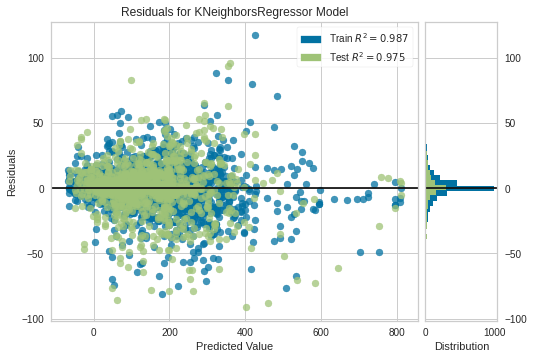

In [86]:
plot_model(best, plot = 'residuals')

In [87]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,11.5886,348.1576,18.6590,0.9746,0.2362,0.1531


,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day357,day358,day359,day360,day361,day362,day363,day364,to_predict4,Label
0,83.0,83.0,81.0,77.0,74.0,75.0,74.0,75.0,76.0,76.0,...,136.0,134.0,133.0,132.0,123.0,121.0,120.0,121.0,104,113.8
1,-38.0,-60.0,-72.0,-73.0,-55.0,-45.0,-42.0,-38.0,-33.0,-24.0,...,-12.0,-22.0,-34.0,-38.0,-35.0,-32.0,-29.0,-24.0,-1,1.2
2,174.0,167.0,156.0,147.0,142.0,140.0,137.0,131.0,124.0,120.0,...,55.0,53.0,54.0,60.0,73.0,86.0,92.0,89.0,67,62.6
3,259.0,266.0,276.0,290.0,314.0,332.0,331.0,312.0,291.0,281.0,...,216.0,196.0,218.0,293.0,297.0,180.0,121.0,123.0,199,180.6
4,119.0,120.0,118.0,117.0,111.0,108.0,116.0,121.0,122.0,128.0,...,19.0,20.0,21.0,25.0,29.0,32.0,33.0,31.0,26,32.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3.0,-6.0,-11.0,-8.0,-7.0,-11.0,-9.0,-6.0,-4.0,-6.0,...,224.0,218.0,197.0,185.0,180.0,194.0,226.0,253.0,246,234.8
1210,81.0,80.0,79.0,74.0,70.0,71.0,76.0,77.0,79.0,81.0,...,-33.0,-24.0,-11.0,-5.0,-4.0,-2.0,37.0,95.0,128,116.0
1211,240.0,203.0,174.0,150.0,134.0,121.0,115.0,123.0,153.0,189.0,...,57.0,67.0,72.0,75.0,75.0,64.0,57.0,50.0,101,78.4
1212,-2.0,14.0,20.0,22.0,24.0,28.0,42.0,54.0,69.0,84.0,...,273.0,254.0,237.0,231.0,259.0,288.0,278.0,258.0,314,299.0


In [88]:
predictions = predict_model(best, data=prediction)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,8.9858,231.8987,15.2282,0.9832,0.2192,0.1471


,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day357,day358,day359,day360,day361,day362,day363,day364,to_predict4,Label
0,148,151,157,163,168,166,161,150,139,140,...,158,156,155,152,148,146,147,143,116,109.8
1,151,157,163,168,166,161,150,139,140,144,...,156,155,152,148,146,147,143,148,120,109.8
2,157,163,168,166,161,150,139,140,144,147,...,155,152,148,146,147,143,148,140,116,109.8
3,163,168,166,161,150,139,140,144,147,149,...,152,148,146,147,143,148,140,130,113,109.8
4,168,166,161,150,139,140,144,147,149,148,...,148,146,147,143,148,140,130,128,106,106.4


In [89]:
save_model(best, 'my_best_pipeline_for_5_days_blagoveshensk')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='to_predict4', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='to_predict4')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
        

/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/hom

/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287400.625, tolerance: 3553.134765625
  model = cd_fast.enet_coordinate_descent(
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1935107.5, tolerance: 3460.6416015625
  model = cd_fast.enet_coordinate_descent(
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute s

/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1470829.75, tolerance: 3516.53955078125
  model = cd_fast.enet_coordinate_descent(
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2011462.375, tolerance: 3516.53955078125
  model = cd_fast.enet_coordinate_descent(
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribu

/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2209321.75, tolerance: 3620.989501953125
  model = cd_fast.enet_coordinate_descent(
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/radmin/anaconda3/envs/yourenvname/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
/home/radmin/anaconda3/env

# 